__________________________________________________________________________________________________
conv5_block1_3_conv (Conv2D)    (None, 1, 1, 2048)   1050624     conv5_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv5_block1_0_bn (BatchNormali (None, 1, 1, 2048)   8192        conv5_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_3_bn (BatchNormali (None, 1, 1, 2048)   8192        conv5_block1_3_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_add (Add)          (None, 1, 1, 2048)   0           conv5_block1_0_bn[0][0]          
                                                                 conv5_block1_3_bn[0][0]          
__________________________________________________________________________________________________
conv5_bloc

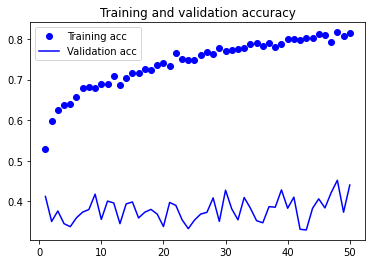

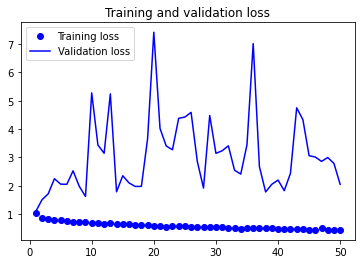

Found 302 images belonging to 3 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
loss: 1.912 - acc: 0.351


In [1]:
import os
from keras import layers
from keras import models
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

    
import tensorflow as tf

if tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None):
    print('gpu is available??')
else:
    print('gpu is available??')



base_dir= os.getcwd()+'/rock_scissor_paper_data'
train_dir= os.path.join(base_dir, 'train')
validation_dir= os.path.join(base_dir, 'valid')
test_dir= os.path.join(base_dir, 'test')

#hyper params
n_train_epoch = 50
n_classes = 3
batch_size = 128

input = layers.Input(shape=(28, 28, 3))
model = ResNet50(input_tensor=input, include_top=False, weights='imagenet', pooling='max')

for layer in model.layers[:-1]:
    layer.trainable = False

x = model.output
x = layers.Dense(1024, name='fully')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dense(3, activation='softmax', name='softmax')(x)
model = models.Model(model.input, x)
model.summary()

for i, layer in enumerate(model.layers):
    print(i, layer.name, "-", layer.trainable)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

def train(save_file):
    # train_geneator= train_
    train_datagen= ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      shear_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True
                                      )
    valid_datagen= ImageDataGenerator(rescale=1./255)

    train_generator= train_datagen.flow_from_directory(train_dir,
                                                       target_size=(28,28),
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

    validation_generator= valid_datagen.flow_from_directory(validation_dir,
                                                            target_size=(28,28),
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

    history= model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//batch_size,
        epochs=n_train_epoch,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//batch_size
    )

    acc= history.history['accuracy']
    val_acc= history.history['val_accuracy']
    loss= history.history['loss']
    val_loss= history.history['val_loss']

    epochs= range(1, len(acc)+1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

    model.save(save_file)


train('rock_scissor_paper.h5')


# from tensorflow.python.keras.models import load_model
# model = load_model('rock_scissor_paper.h5')


test_datagen= ImageDataGenerator(rescale=1./255)
test_generator= test_datagen.flow_from_directory(test_dir,
                                                 target_size=(28,28),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

# loss_and_metrics = model.evaluate(x_test,y_test,batch_size=32)
loss_and_metrics= model.evaluate_generator(
    test_generator,
    steps=test_generator.samples# number of steps (batches of samples) to yield from generator before stopping
)

print("loss: %.3f - acc: %.3f" % (loss_and_metrics[0], loss_and_metrics[1]))
# 모델 훈련
#model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)